In [ ]:
%matplotlib inline


# A demo of structured Ward hierarchical clustering on a raccoon face image


Compute the segmentation of a 2D image with Ward hierarchical
clustering. The clustering is spatially constrained in order
for each segmented region to be in one piece.



In [31]:
import h5py
import numpy as np
def add_heights(file):
    datasets = h5py.File(file, 'r')
    points = []
    for data in datasets:
        if (data != "how" and data != "what" and data != "where"):
            data_DBZH = datasets[data]["data1"]["data"][()]
    return points
add_heights('nldbl_pvol_20160930T0000Z.h5')

IOError: Unable to open file (unable to open file: name = 'nldbl_pvol_20160930T0000Z.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

(768, 1024)
Compute structured hierarchical clustering...
('Elapsed time: ', 0.6732840538024902)
('Number of pixels: ', 7752)
('Number of clusters: ', 15)


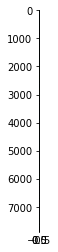

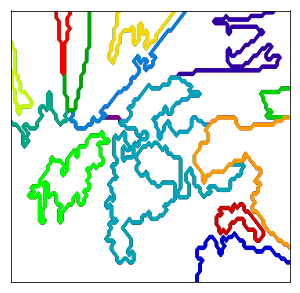

In [26]:
# Author : Vincent Michel, 2010
#          Alexandre Gramfort, 2011
# License: BSD 3 clause


import time as time

import numpy as np
import scipy as sp

import matplotlib.pyplot as plt

from sklearn.feature_extraction.image import grid_to_graph
from sklearn.cluster import AgglomerativeClustering
from skimage.transform import resize


# #############################################################################
# Generate data
try:  # SciPy >= 0.16 have face in misc
    from scipy.misc import face
    face = face(gray=True)
    plt.imshow(face)
except ImportError:
    face = sp.face(gray=True)
print(face.shape)
# Resize it to 10% of the original size to speed up the processing
face = resize(face, (int(face.shape[0]*0.1), int(face.shape[1]*0.1))) / 255.


plt.imshow(X)
X = np.reshape(face, (-1, 1))

# #############################################################################
# Define the structure A of the data. Pixels connected to their neighbors.
connectivity = grid_to_graph(*face.shape)

# #############################################################################
# Compute clustering
print("Compute structured hierarchical clustering...")
st = time.time()
n_clusters = 15  # number of regions
ward = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward',
                               connectivity=connectivity)
ward.fit(X)
label = np.reshape(ward.labels_, face.shape)
print("Elapsed time: ", time.time() - st)
print("Number of pixels: ", label.size)
print("Number of clusters: ", np.unique(label).size)

# #############################################################################
# Plot the results on an image
plt.figure(figsize=(5, 5))
#plt.imshow(face, cmap=plt.cm.gray)
for l in range(n_clusters):
    plt.contour(label == l, contours=1,
                colors=[plt.cm.spectral(l / float(n_clusters)), ])
plt.xticks(())
plt.yticks(())
plt.show()